## 1. Google Play Store apps and reviews
<p> Les applications mobiles sont partout. Ils sont faciles à créer et peuvent être lucratifs. En raison de ces deux facteurs, de plus en plus d'applications sont en cours de développement. Dans ce notebook, nous effectuerons une analyse complète du marché des applications Android en comparant plus de dix mille applications dans Google Play dans différentes catégories. Nous rechercherons des informations dans les données pour concevoir des stratégies de croissance et la rétention. </p>

<p> Jetons un œil aux données, qui se composent de deux fichiers: </p>
<ul>
<li> <code> apps.csv </code>: contient tous les détails des applications sur Google Play. Il existe 13 features qui décrivent une application donnée. </li>
<li> <code> user_reviews.csv </code>: contient 100 avis pour chaque application, les plus utiles en premier. Le texte de chaque avis a été prétraité et attribué avec trois nouvelles fonctionnalités: le sentiment (positif, négatif ou neutre), la polarité du sentiment et la subjectivité du sentiment. </li>
</ul>

In [6]:
import pandas as pd
apps = pd.read_csv('datasets/apps.csv')

# Supprimer les doublons
apps = apps.drop_duplicates()

print('Le nombre total d applications dans le dataset = ', apps.shape[0])

print(apps.info())

print(apps.sample(5))

Le nombre total d applications dans le dataset =  9659
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None
      Unnamed: 0                  App            C

## 2. Nettoyage des données

In [7]:
chars_to_remove = [',','$','+']

cols_to_clean = ['Price', "Installs"]

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
    apps[col] = apps[col].astype(float)

## 3. Explorer les catégories d'applications

In [8]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)
data = [go.Bar(
        x = num_apps_in_category.index,
        y = num_apps_in_category.values,
)]

plotly.offline.iplot(data)

Number of categories =  33


## 4. Évaluations de l'application

In [9]:
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

data = [go.Histogram(
        x = apps['Rating']
)]

layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


## 5. Taille et prix d'une application

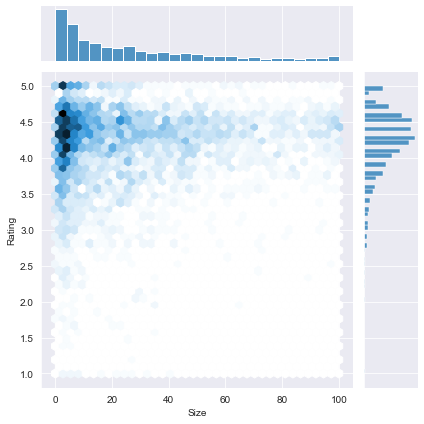

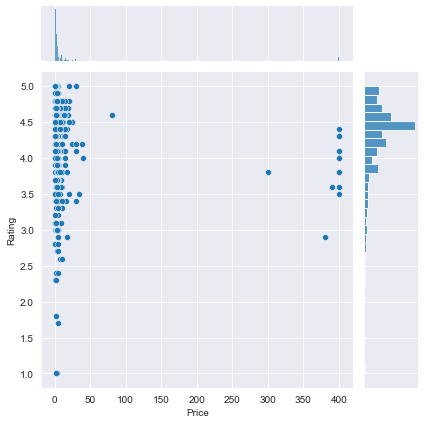

In [10]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

apps_with_size_and_rating_present = apps[(apps['Rating'].notnull()) & (apps['Size'].notnull())]

large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == "Paid"]

plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

## 6. Relation entre la catégorie d'application et le prix de l'application

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


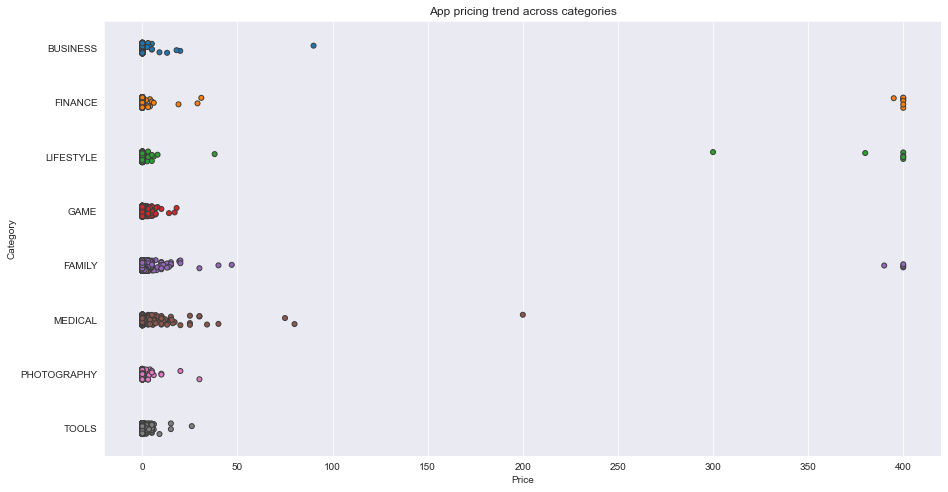

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

## 7. Filtrer les applications "indésirables"
<p> Il semble que de nombreuses applications très coûteuses soient des applications "indésirables". Autrement dit, des applications qui n'ont pas vraiment de but. Certains développeurs d'applications peuvent créer une application appelée <em> I Am Rich Premium </em> ou <em> most expensive app (H) </em> juste pour une blague ou pour tester leurs compétences en développement d'applications.</p>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

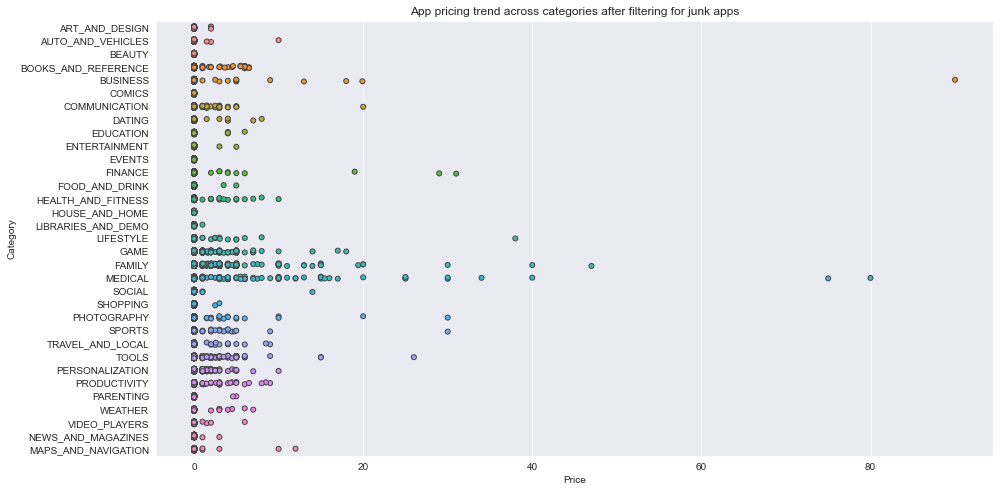

In [12]:
# Select apps priced below $100
apps_under_100 = apps[apps['Price'] <= 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 8. Popularité des applications payantes par rapport aux applications gratuites

In [13]:
trace0 = go.Box(
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 9. Analyse du sentiment des avis des utilisateurs

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

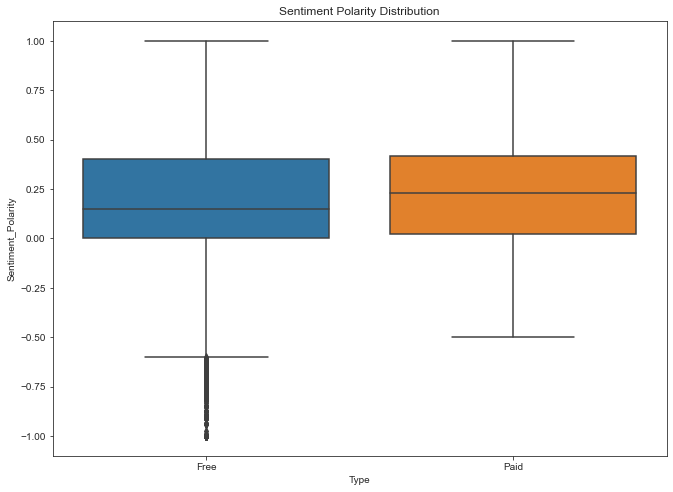

In [14]:
reviews_df = pd.read_csv('datasets/user_reviews.csv')

merged_df = apps.merge(reviews_df, how='left', on="App")

merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(y = 'Sentiment_Polarity', x = 'Type', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')